In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline 

In [2]:
# Loading the datasets
df = pd.read_csv("data/test_values.csv")
df_tar= pd.read_csv("data/train_labels.csv")

In [3]:
df.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101,16,276,...,1,NaN,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87,20,68,...,1,107.0,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,-1,-1,-1,...,2,119.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,False
3,3,2,1,1,1,179.0,2,376,20,11,...,2,44.0,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254,48,156,...,3,32.0,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,False


In [4]:
df.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,459859.000000,477520.000000,477518.000000,477547.000000,477483.000000,477426.000000,477450.000000,500000.000000
mean,249999.500000,1.367028,1.047556,2.070192,1.108330,222.954214,2.764926,181.518910,23.771794,144.715824,...,4.787448,1.461534,101.926536,5411.205196,31.631572,69254.074141,91.813397,1426.559815,1884.863422,3719.194494
std,144337.711634,0.690104,0.231133,0.947980,0.324214,669.975457,0.542847,138.262853,15.978295,100.397007,...,1.022982,0.676923,148.003593,2719.506721,26.331363,14826.683469,14.218730,737.048133,914.985938,1840.072583
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,0.317000,17851.000000,6.215000,3.000000,1.000000,1.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,5.000000,1.000000,47.000000,3746.000000,10.705000,59739.000000,88.017000,943.000000,1302.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,5.000000,1.000000,74.000000,4975.000000,22.955000,67514.000000,100.000000,1326.000000,1753.000000,3713.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,5.000000,2.000000,117.000000,6455.000000,45.972000,75414.000000,100.000000,1777.000000,2305.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,102074.000000,3.000000,408.000000,52.000000,324.000000,...,7.000000,4.000000,10261.000000,34194.000000,100.000000,125244.000000,100.000000,8754.000000,13609.000000,6508.000000


In [5]:
# droping the row_id column
df.drop("row_id", axis = 1, inplace =True)

In [6]:
# replacing any -1 values with np.nan to deal with it as missing values 
for i in df.columns:
    df[i] = df[i].replace(-1, np.nan)

df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76993
state_code                        19120
county_code                       20566
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [7]:
# replacing the boolean values in the co-applicant columns to 0 and 1 integers
le = preprocessing.LabelEncoder()
df["co_applicant"]=le.fit_transform(df["co_applicant"])
df["co_applicant"].unique()

array([1, 0])

In [8]:
# replacing the missing values in the categorical columns with 0    
df["msa_md"] = df["msa_md"].fillna(0)
df["state_code"] = df["state_code"].fillna(0)
df["county_code"] = df["county_code"].fillna(0)

In [9]:
df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  40141
population                        22480
minority_population_pct           22482
ffiecmedian_family_income         22453
tract_to_msa_md_income_pct        22517
number_of_owner-occupied_units    22574
number_of_1_to_4_family_units     22550
lender                                0
co_applicant                          0
dtype: int64

In [10]:
# replacing the numrical columns with the median
df["population"].fillna(df["population"].median(), inplace = True)

df["minority_population_pct"].fillna(df["minority_population_pct"].median(), inplace = True)

df["ffiecmedian_family_income"].fillna(df["ffiecmedian_family_income"].median(), 
                                       inplace = True)

df["number_of_owner-occupied_units"].fillna(df["number_of_owner-occupied_units"].median(), 
                                            inplace = True)

df["tract_to_msa_md_income_pct"].fillna(df["tract_to_msa_md_income_pct"].median(), 
                                        inplace = True)

df["number_of_1_to_4_family_units"].fillna(df["number_of_1_to_4_family_units"].median(),
                                           inplace = True)

In [11]:
# Getting the log of the loan amount column to deal with the outliers
df['loan_amount'] = np.log(df['loan_amount'])

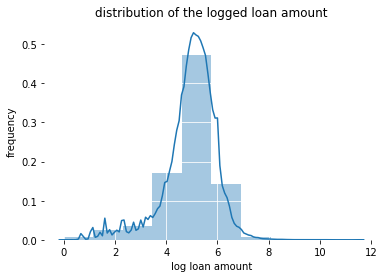

In [12]:
# ploting the logged loan amount column
sns.distplot(df['loan_amount'], bins = 10)
plt.xlabel("log loan amount")
plt.ylabel("frequency")
plt.title("distribution of the logged loan amount")
plt.box(False)
plt.grid(color = "white")
plt.show()

In [13]:
# filling the missing values in the applicant income column and getting logged values to treat the outliers
df["applicant_income"].fillna(df["applicant_income"].median(), inplace = True)
df['applicant_income'] = np.log(df['applicant_income'])

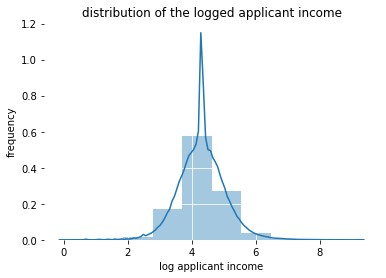

In [14]:
# visualizing the new logged applicant income 
sns.distplot(df['applicant_income'], bins = 10)
plt.xlabel("log applicant income")
plt.ylabel("frequency")
plt.title("distribution of the logged applicant income")
plt.box(False)
plt.grid(color = "white")
plt.show()

In [15]:
df.head(5).T

,0,1,2,3,4
loan_type,2.000000,1.000000,1.000000,2.000000,2.000000
property_type,1.000000,1.000000,1.000000,1.000000,1.000000
loan_purpose,3.000000,1.000000,1.000000,1.000000,1.000000
occupancy,1.000000,1.000000,1.000000,1.000000,1.000000
loan_amount,4.744932,5.529429,5.598422,5.187386,3.583519
preapproval,3.000000,2.000000,1.000000,2.000000,2.000000
msa_md,101.000000,87.000000,0.000000,376.000000,254.000000
state_code,16.000000,20.000000,0.000000,20.000000,48.000000
county_code,276.000000,68.000000,0.000000,11.000000,156.000000
applicant_ethnicity,2.000000,2.000000,2.000000,2.000000,3.000000


In [16]:
# getting a better sense of the corrlation between the different features and the target column 
df.apply(lambda x: x.corr(df_tar.accepted))

loan_type                        -0.001495
property_type                     0.001014
loan_purpose                     -0.001527
occupancy                        -0.000159
loan_amount                      -0.000853
preapproval                       0.000813
msa_md                           -0.000806
state_code                       -0.000097
county_code                       0.000132
applicant_ethnicity               0.001622
applicant_race                    0.000748
applicant_sex                     0.000927
applicant_income                 -0.001495
population                       -0.000395
minority_population_pct          -0.000939
ffiecmedian_family_income        -0.000494
tract_to_msa_md_income_pct       -0.000433
number_of_owner-occupied_units    0.000345
number_of_1_to_4_family_units     0.000916
lender                           -0.001487
co_applicant                     -0.000682
dtype: float64

In [17]:
# getting a better sense of the corrlation between the columns and each others
df.corr()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
loan_type,1.000000,-0.064351,-0.120440,-0.159784,0.098760,-0.131491,-0.023598,-0.047316,-0.016880,-0.048781,...,-0.072555,-0.134026,0.039983,0.011570,-0.069133,-0.000649,0.034027,0.050436,-0.029353,-0.022861
property_type,-0.064351,1.000000,-0.114710,0.153120,-0.092917,0.046284,-0.076593,-0.015690,-0.009050,0.129107,...,0.106260,-0.135705,-0.026131,-0.019240,-0.088804,-0.051919,-0.028117,0.004410,-0.034214,-0.028551
loan_purpose,-0.120440,-0.114710,1.000000,-0.000026,0.020944,0.488867,0.071944,0.115617,0.056387,0.022401,...,0.014228,0.035911,-0.005309,0.054638,0.058173,-0.024255,-0.009811,-0.015972,0.051876,0.012432
occupancy,-0.159784,0.153120,-0.000026,1.000000,0.006341,0.044487,-0.010437,0.012132,0.009746,0.159046,...,0.130233,0.133627,-0.050583,0.048944,-0.024220,-0.103117,-0.086369,-0.018971,-0.001385,-0.020827
loan_amount,0.098760,-0.092917,0.020944,0.006341,1.000000,-0.084880,0.069977,0.093864,-0.006028,0.059399,...,-0.050167,0.474614,0.052397,-0.024951,0.270616,0.192994,0.038644,-0.027562,0.040068,0.147783
preapproval,-0.131491,0.046284,0.488867,0.044487,-0.084880,1.000000,0.127688,0.177505,0.157546,0.020268,...,0.020537,0.019320,0.003693,0.060622,0.016574,-0.072424,-0.002598,0.004956,0.000946,0.013203
msa_md,-0.023598,-0.076593,0.071944,-0.010437,0.069977,0.127688,1.000000,0.142496,0.160163,-0.014744,...,0.000782,0.076732,0.070420,0.099212,0.262855,-0.055447,0.045568,-0.032458,0.015025,-0.004165
state_code,-0.047316,-0.015690,0.115617,0.012132,0.093864,0.177505,0.142496,1.000000,0.016396,0.000404,...,-0.002430,0.059388,-0.072857,0.031459,0.196152,-0.056805,-0.095038,-0.115851,0.018299,0.028607
county_code,-0.016880,-0.009050,0.056387,0.009746,-0.006028,0.157546,0.160163,0.016396,1.000000,0.004306,...,-0.001663,0.025656,0.071850,0.037391,0.055238,-0.048563,0.050176,0.053833,0.004045,0.001693
applicant_ethnicity,-0.048781,0.129107,0.022401,0.159046,0.059399,0.020268,-0.014744,0.000404,0.004306,1.000000,...,0.497579,0.071425,-0.039706,-0.168789,0.077004,0.041448,0.007344,0.001297,0.010195,-0.123145


Text(0.5, 1, 'Corrlation between number_of_1_to_4_family_units and number_of_owner-occupied_units')

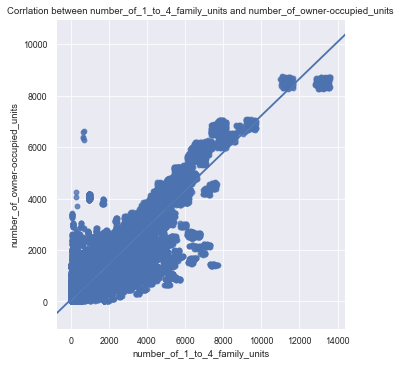

In [18]:
# plot the corrlation between two columns 
sns.set()
sns.set_context("paper")
sns.lmplot(x ="number_of_1_to_4_family_units", y = "number_of_owner-occupied_units", data=df) 
plt.title("Corrlation between number_of_1_to_4_family_units and number_of_owner-occupied_units")

In [19]:
# spliting the data
x = df
y = df_tar["accepted"]
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size= 0.2 , random_state=1234)

In [20]:
# identifying the categorical columns for the model
cat_feat = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 19, 20]

In [ ]:
# Building the model
model = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=42, 
                           learning_rate=0.24, silent=True, cat_features=cat_feat, depth = 6)
model.fit(x_train,y_train,eval_set=(x_test,y_test))

In [ ]:
# predicting the test data and evaluating it 
yhat = model.predict(x_test)
print("accuracy of the model=", accuracy_score(y_test, yhat)) 
print("class", classification_report(y_test, yhat))

In [ ]:
# building a confusion matrix for the evaluation and slicing it into four pieces
confusion = confusion_matrix(y_test, yhat)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]